# Predict & Plot Protein Contact Maps in 5 Seconds

Let's say you want to securely generate a fast but accurate contact map for visualization or ML. BioLM lets you predict the contact map data in seconds, no spinning up GPUs or installing programs and dependencies.

In [1]:
import os, sys
import numpy as np

from matplotlib import pyplot as plt

# Add Python module with utility functions for interacting with BioLM API
repo_root = os.path.join(os.getcwd(), '..', '..')
src_dir = os.path.join(repo_root, 'src')
if src_dir not in sys.path:
    sys.path.append(src_dir)
    
import biolm_util

In [2]:
tokens = biolm_util.get_api_token()  # They should be set as env vars now, so not needed

In [3]:
wt = "VPVNPEPDATSVENVALKTGSGDSQSDPIKADLEVKGQSALPFDVDCWAILCKGAPNVLQRVNEKTKNSNRDRSGANKGPFKDPQKWGIKALPPKNPSWSAQDFKSPEEYAFASSLQGGTNAILAPVNLASQNSQGGVLNGFYSANKVAQFDPSKPQQTKGTWFQITKFTGAAGPYCKALGSNDKSVCDKNKNIAGDWGFDPAKWAYQYDEKNNKFNYVGK"

print("Sequence length: {}".format(len(wt)))

Sequence length: 221


Let's make a secure REST API request to BioLM API to quickly make the prediction on GPU.

In [4]:
%%time

wt_transforms = biolm_util.esm2_transform(wt)  # POST request done here

wt_transform = wt_transforms[0]  # We only POSTed one sequence, so we get the first result only

wt_transform.keys()

CPU times: user 51.2 ms, sys: 16.9 ms, total: 68.1 ms
Wall time: 2.2 s


dict_keys(['name', 'mean_representations', 'contacts', 'logits', 'attentions'])

Since the model is already hot (loaded into memory on a GPU server in the cloud), it takes 1.5 sec to get several pertinent sequence representations from ESM2. There are keys containing

 * our `contacts`, which is a `len(seq) x len(seq)` matrix
 * the `logits` from the final hidden state, which is a vector of `len(seq)`
 * the `attentions` or attention map, which is `len(seq) x n_layers`
 * `mean_representations`, which are the protein embeddings which is a vector of `1280`
 * lastly `name`, which is simply the index of the sequence in the order it was POSTed

In [5]:
contacts = np.array(wt_transform['contacts'])

contacts.shape  # Straight from the model, this would be 223, 223 due to start/end tokens

(221, 221)

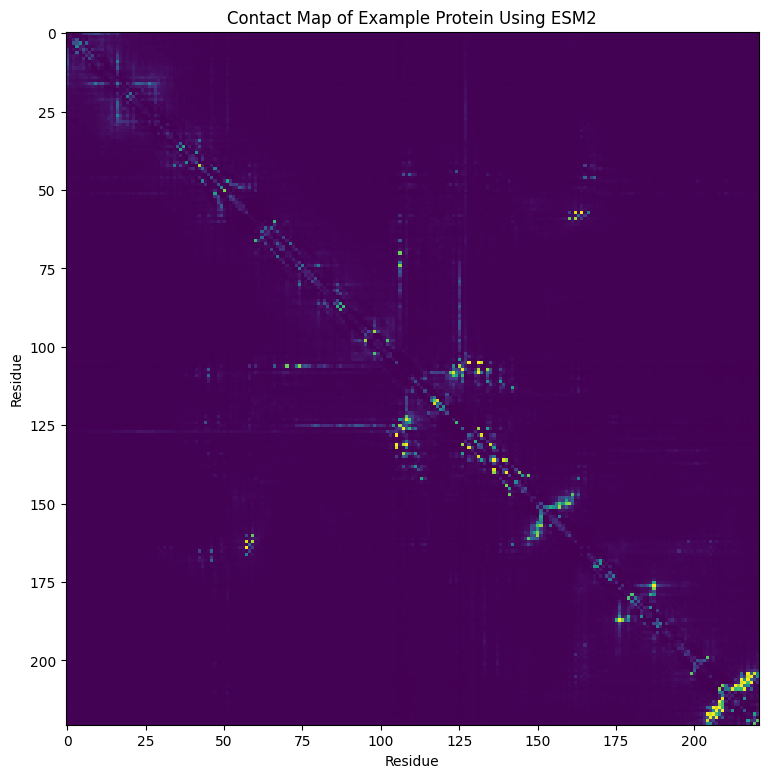

In [8]:
plt.figure(figsize=(9, 9))
plt.xlabel('Residue')
plt.ylabel('Residue')
plt.title('Contact Map of Example Protein Using ESM2')
plt.imshow(contacts, cmap='viridis', interpolation='nearest')
plt.show()